# Homework from Lecture 10

### Burger's equation

In real-world applications, the advection velocity $v$ is usually variable.  For example,

\begin{equation}
\frac{\partial U}{\partial t}+U\frac{\partial U}{\partial x}=0.
\end{equation}

This is called Burger's equation, where the advection velocity depends on the property being advected, i.e., $U$.

1)Let's try the upwind method to solve this equation with an initial Gaussian profile. (U before $\frac{\partial U}{\partial x}$ is velocity at n and j)

2)Please experiment with different grid sizes.

3)Now the solution develops a non-symmetric profile over time.  Can you explain why?

In [1]:
# Burger's equation:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = .8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)
vel=U

## Upwind Method

Recall the solution is just original profile displaced by $v t$.
So the information is propagating from left to right if $v > 0$. The central difference
thus should use information from the upstream. 

The spatial derivative is approximated with the one-sided difference
\begin{eqnarray}
U_{x}=\frac{U_{j}^n-U_{j-1}^n}{\Delta x} \qquad if \qquad v>0\\
U_{x}=\frac{U_{j+1}^n-U_{j}^n}{\Delta x} \qquad if \qquad v<0\\
\end{eqnarray}
It has the same stability requirement as the Lax-Friedrichs method
\begin{equation}
U_j^{n+1}=U_j^n-(v\Delta t) U_{x}
\end{equation}

We have either:
\begin{equation}
U_{j}^{n+1}=U_{j}^n-\frac{v\Delta t}{2\Delta x}(U_j^n-U_{j-1}^n)
\end{equation}

or:
\begin{equation}
U_{j}^{n+1}=U_{j}^n-\frac{v\Delta t}{2\Delta x}(U_{j+1}^n-U_j^n)
\end{equation}

t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007
Done.


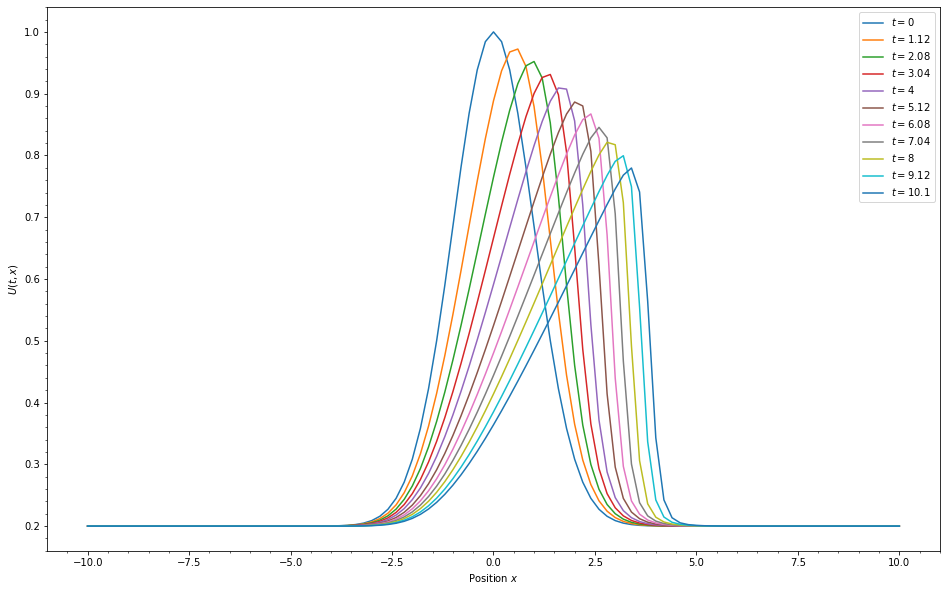

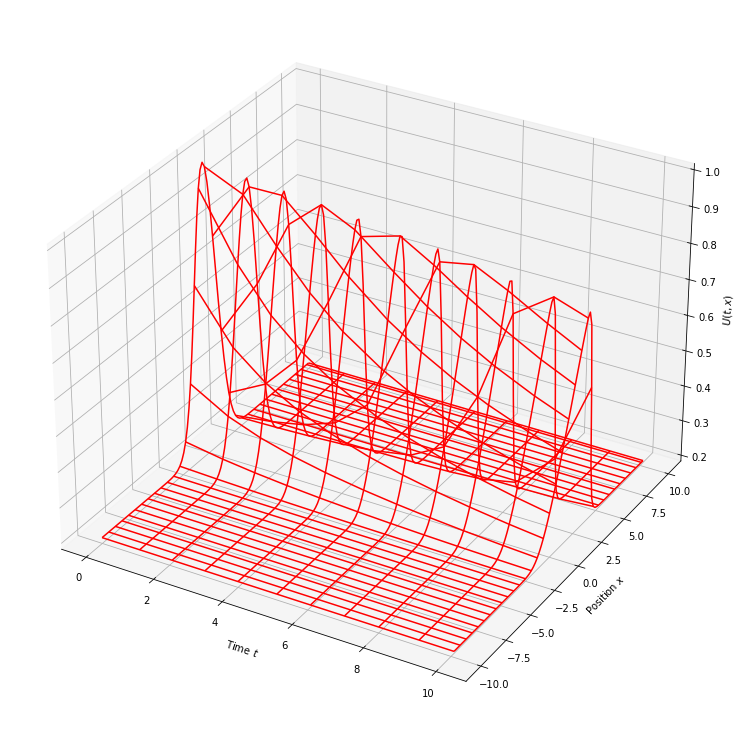

In [2]:
# Upwind method

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)
    # Find the state at the next time step.
    for ix in range(1, Nx - 1):
        if vel[ix] > 0:
            U[ix]=Uold[ix]-(vel[ix]/2)*(dt/dx)*(Uold[ix]-Uold[ix-1]) 
        else:
            U[ix]=Uold[ix]-(vel[ix]/2)*(dt/dx)*(Uold[ix+1]-Uold[ix])
            
    t += dt
    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

### Try different grid sizes

t =  1.04
t =  2.08
t =  3.119999999999999
t =  4.159999999999998
t =  5.1999999999999975
t =  6.239999999999997
t =  7.019999999999996
t =  8.059999999999995
t =  9.099999999999994
t =  10.139999999999993
Done.


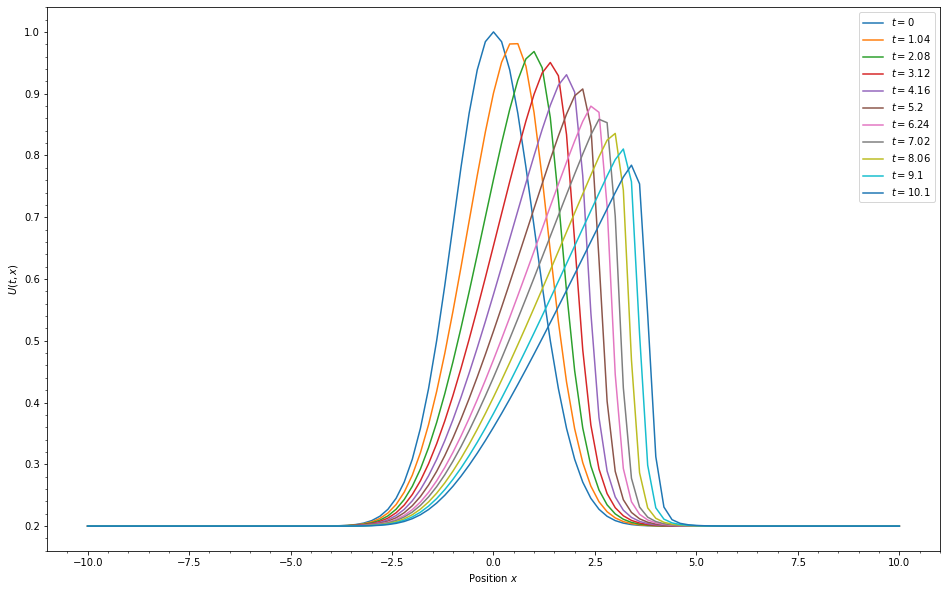

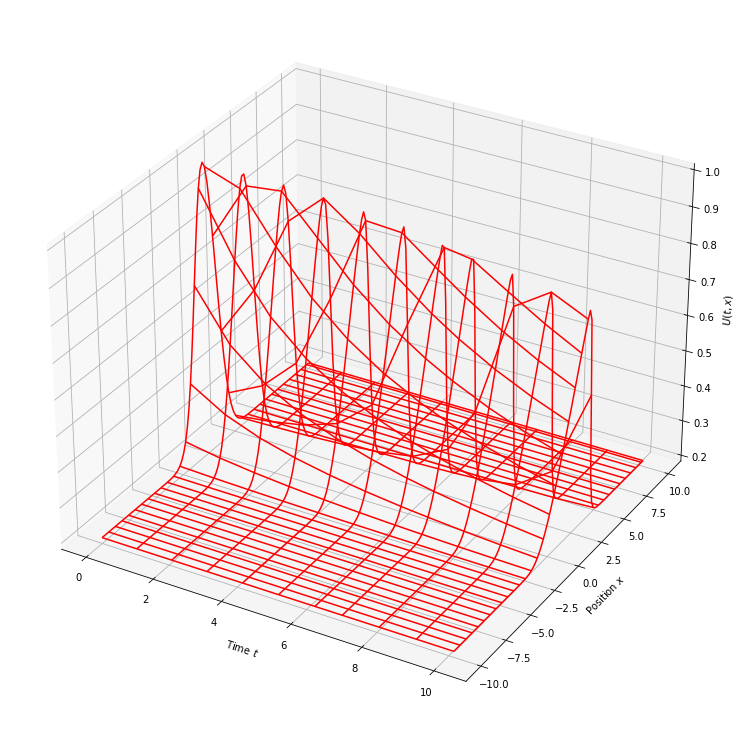

In [3]:
dtout2 = 1.0

# Set up the grid.
x2 = np.linspace(xmin, xmax, Nx)
dx2 = (xmax - xmin) / (Nx - 1)
dt2 = 1.3 * dx2
U2 = np.zeros(Nx,)

# Give the initial profile.
t2 = 0.0
U2 = 0.2 + 0.8 * np.exp(-0.5 * x2**2)
vel2=U2

# Prepare for 3D outputs.
tp2 = [t2]
Up2 = np.copy(U2)

# Initiate the plot.
fig2 = plt.figure(figsize=(16,10))
ax2 = fig2.gca()
ax2.plot(x2, U2, label=r"$t = {:.3G}$".format(t2))
ax2.set_xlabel(r"Position $x$")
ax2.set_ylabel(r"$U(t,x)$")
ax2.minorticks_on()

# Begin the simulation.
tout2 = t2 + dtout2
while t2 < tend:
    # Backup the previous time step.
    Uold2 = np.copy(U2)
    # Find the state at the next time step.
    for ix in range(1, Nx - 1):
        if vel2[ix] > 0:
            U2[ix]=Uold2[ix]-(vel2[ix]/2)*(dt2/dx2)*(Uold2[ix]-Uold2[ix-1]) 
        else:
            U2[ix]=Uold2[ix]-(vel2[ix]/2)*(dt2/dx2)*(Uold2[ix+1]-Uold2[ix])
            
    t2 += dt2
    # Save the data after every dtout.
    if t2 >= tout2:
        plt.plot(x2, U2, label=r"$t = {:.3G}$".format(t2))
        tp2.append(t2)
        Up2 = np.vstack((Up2, U2))
        print("t = ", t2)
        tout2 += dtout2

ax2.legend()

# Create 3D-view of the solution.
t2, x2 = np.meshgrid(tp2, x2)
fig3D2 = plt.figure(figsize=(16,10))
ax3D2 = Axes3D(fig3D2)
ax3D2.plot_wireframe(t2, x2, Up2.transpose(), color="red")
ax3D2.set_xlabel("Time $t$")
ax3D2.set_ylabel("Position $x$")
ax3D2.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

t =  1.08
t =  2.16
t =  3.2399999999999998
t =  4.319999999999999
t =  5.04
t =  6.120000000000001
t =  7.200000000000002
t =  8.280000000000003
t =  9.000000000000002
t =  10.08
Done.


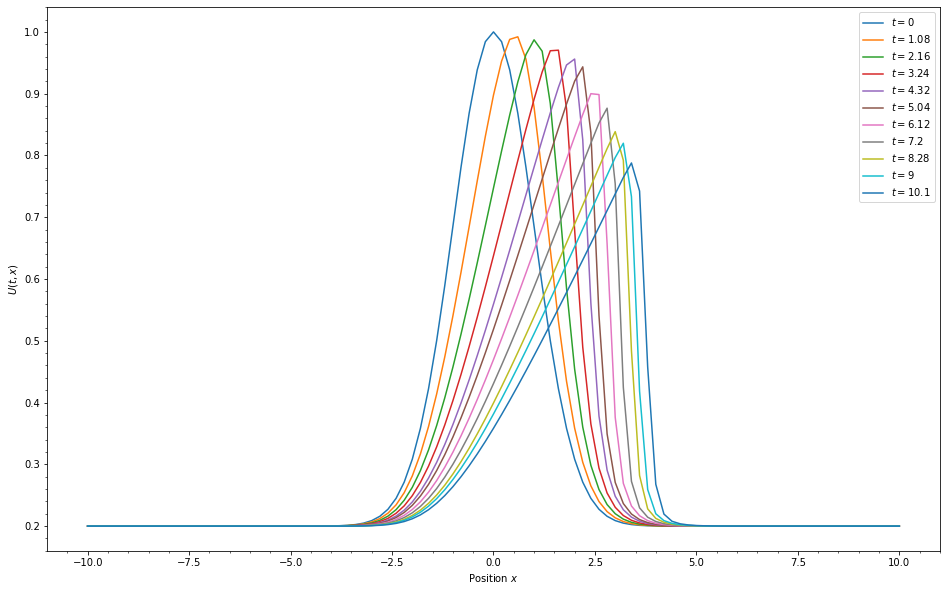

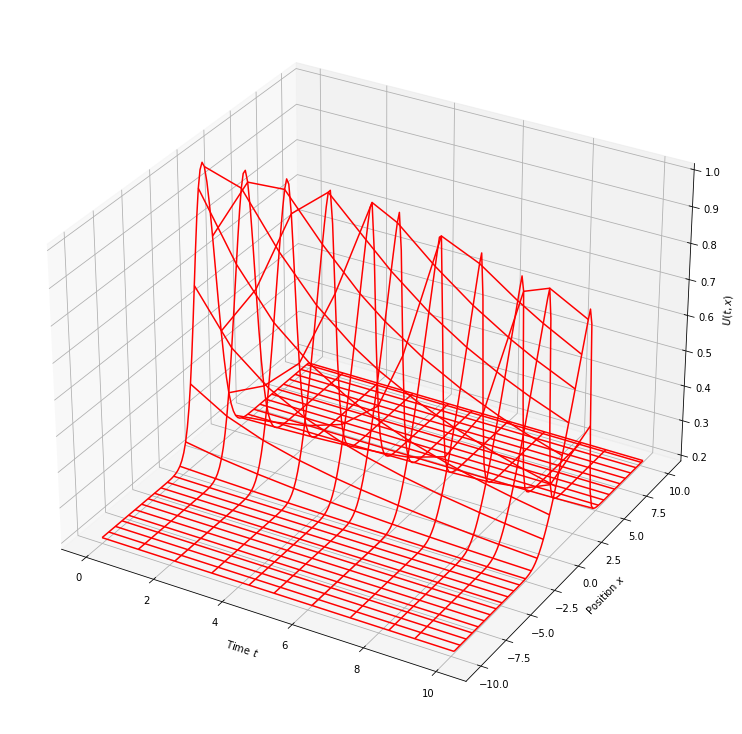

In [4]:
dtout3 = 1.0

# Set up the grid.
x3 = np.linspace(xmin, xmax, Nx)
dx3 = (xmax - xmin) / (Nx - 1)
dt3 =  1.8* dx3
U3 = np.zeros(Nx,)

# Give the initial profile.
t3 = 0.0
U3 = 0.2 + 0.8 * np.exp(-0.5 * x3**2)
vel3=U3

# Prepare for 3D outputs.
tp3 = [t3]
Up3 = np.copy(U3)

# Initiate the plot.
fig3 = plt.figure(figsize=(16,10))
ax3 = fig3.gca()
ax3.plot(x3, U3, label=r"$t = {:.3G}$".format(t3))
ax3.set_xlabel(r"Position $x$")
ax3.set_ylabel(r"$U(t,x)$")
ax3.minorticks_on()

# Begin the simulation.
tout3 = t3 + dtout3
while t3 < tend:
    # Backup the previous time step.
    Uold3 = np.copy(U3)
    # Find the state at the next time step.
    for ix in range(1, Nx - 1):
        if vel3[ix] > 0:
            U3[ix]=Uold3[ix]-(vel3[ix]/2)*(dt3/dx3)*(Uold3[ix]-Uold3[ix-1]) 
        else:
            U3[ix]=Uold3[ix]-(vel3[ix]/2)*(dt3/dx3)*(Uold3[ix+1]-Uold3[ix])
            
    t3 += dt3
    # Save the data after every dtout.
    if t3 >= tout3:
        plt.plot(x3, U3, label=r"$t = {:.3G}$".format(t3))
        tp3.append(t3)
        Up3 = np.vstack((Up3, U3))
        print("t = ", t3)
        tout3 += dtout3

ax3.legend()

# Create 3D-view of the solution.
t3, x3 = np.meshgrid(tp3, x3)
fig3D3 = plt.figure(figsize=(16,10))
ax3D3 = Axes3D(fig3D3)
ax3D3.plot_wireframe(t3, x3, Up3.transpose(), color="red")
ax3D3.set_xlabel("Time $t$")
ax3D3.set_ylabel("Position $x$")
ax3D3.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

t =  1.2600000000000002
t =  2.1
t =  3.36
t =  4.2
t =  5.04
t =  6.3
t =  7.14
t =  8.4
t =  9.24
t =  10.08
Done.


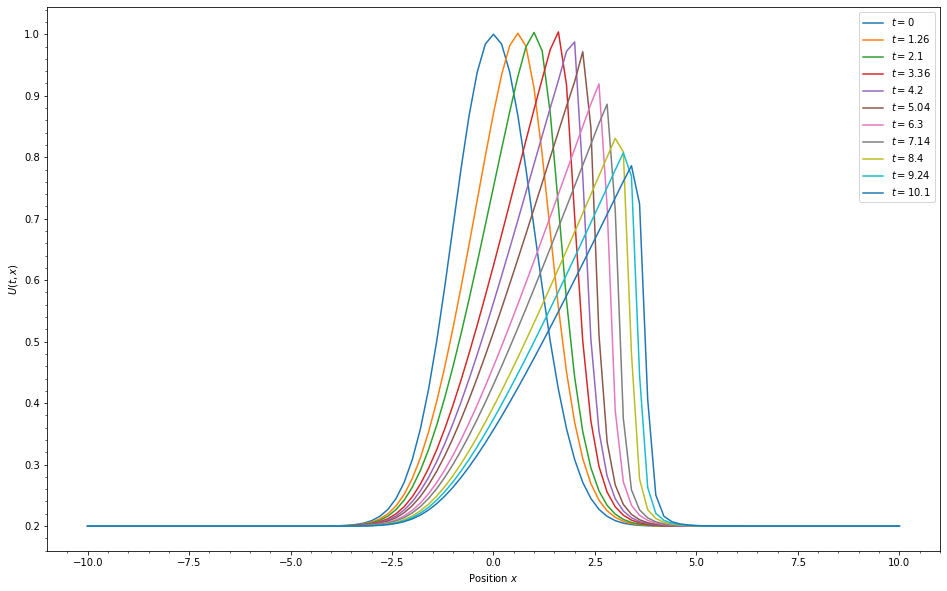

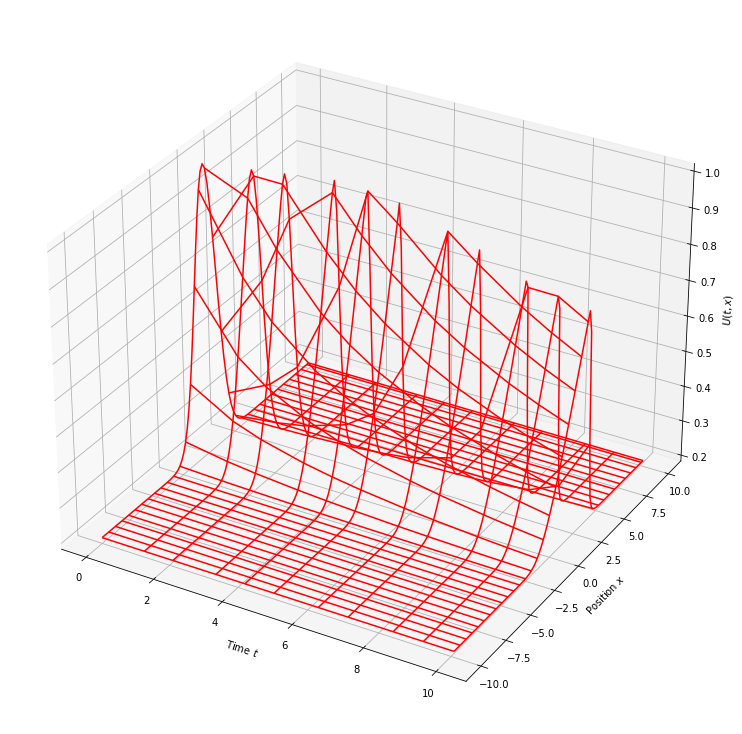

In [5]:
dtout4 = 1.0

# Set up the grid.
x4 = np.linspace(xmin, xmax, Nx)
dx4 = (xmax - xmin) / (Nx - 1)
dt4 = 2.1 * dx4
U4 = np.zeros(Nx,)

# Give the initial profile.
t4 = 0.0
U4 = 0.2 + 0.8 * np.exp(-0.5 * x4**2)
vel4=U4

# Prepare for 3D outputs.
tp4 = [t4]
Up4 = np.copy(U4)

# Initiate the plot.
fig4 = plt.figure(figsize=(16,10))
ax4 = fig4.gca()
ax4.plot(x4, U4, label=r"$t = {:.3G}$".format(t4))
ax4.set_xlabel(r"Position $x$")
ax4.set_ylabel(r"$U(t,x)$")
ax4.minorticks_on()

# Begin the simulation.
tout4 = t4 + dtout4
while t4 < tend:
    # Backup the previous time step.
    Uold4 = np.copy(U4)
    # Find the state at the next time step.
    for ix in range(1, Nx - 1):
        if vel4[ix] > 0:
            U4[ix]=Uold4[ix]-(vel4[ix]/2)*(dt4/dx4)*(Uold4[ix]-Uold4[ix-1]) 
        else:
            U4[ix]=Uold4[ix]-(vel4[ix]/2)*(dt4/dx4)*(Uold4[ix+1]-Uold4[ix])
            
    t4 += dt4
    # Save the data after every dtout.
    if t4 >= tout4:
        plt.plot(x4, U4, label=r"$t = {:.3G}$".format(t4))
        tp4.append(t4)
        Up4 = np.vstack((Up4, U4))
        print("t = ", t4)
        tout4 += dtout4

ax4.legend()

# Create 3D-view of the solution.
t4, x4 = np.meshgrid(tp4, x4)
fig3D4 = plt.figure(figsize=(16,10))
ax3D4 = Axes3D(fig3D4)
ax3D4.plot_wireframe(t4, x4, Up4.transpose(), color="red")
ax3D4.set_xlabel("Time $t$")
ax3D4.set_ylabel("Position $x$")
ax3D4.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

Changing the grid sizes, the time step, affects the height of the peak because we are outputting the plot for different times in the evolution.

Now the solution develops a non-symmetric profile over time.  Can you explain why?

Since we don't have the diffusion term in our equation, we get viscous shocks.
This causes breaks and the discontinuity is what causes this non-symmetric profile over time.
